In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df=pd.read_csv("/home/shraddha/Downloads/exams.csv")

In [49]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [51]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [52]:
df.duplicated().sum()

0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [54]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

In [55]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [56]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [57]:
df['average'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

In [59]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group D,some college,standard,completed,59,70,78,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,84.666667
...,...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71,75.000000
996,male,group C,some college,standard,none,80,66,66,70.666667
997,female,group A,high school,standard,completed,67,86,86,79.666667
998,male,group E,high school,standard,none,80,72,62,71.333333


In [62]:
from sklearn import preprocessing

In [63]:
label_encoder = preprocessing.LabelEncoder() 

In [64]:
df['gender']= label_encoder.fit_transform(df['gender'])

In [65]:
df['gender'].unique() 

array([0, 1])

In [66]:
df['lunch']= label_encoder.fit_transform(df['lunch'])
df['lunch'].unique()

array([1, 0])

In [67]:
df['parental level of education']= label_encoder.fit_transform(df['parental level of education'])
df['parental level of education'].unique()

array([4, 0, 5, 1, 3, 2])

In [68]:
df['race/ethnicity']= label_encoder.fit_transform(df['race/ethnicity'])
df['race/ethnicity'].unique()

array([3, 1, 2, 4, 0])

In [69]:
df['test preparation course']= label_encoder.fit_transform(df['test preparation course'])
df['test preparation course'].unique()

array([0, 1])

In [70]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,0,3,4,1,0,59,70,78,69.000000
1,1,3,0,1,1,96,93,87,92.000000
2,0,3,4,0,1,57,76,77,70.000000
3,1,1,4,0,1,70,70,63,67.666667
4,0,3,0,1,1,83,85,86,84.666667


In [79]:
X=df[df.columns.difference(['average'])]
y=df['average']
X.head()

,gender,lunch,math score,parental level of education,race/ethnicity,reading score,test preparation course,writing score
0,0,1,59,4,3,70,0,78
1,1,1,96,0,3,93,1,87
2,0,0,57,4,3,76,1,77
3,1,0,70,4,1,70,1,63
4,0,1,83,0,3,85,1,86


In [80]:
y.head()

0    69.000000
1    92.000000
2    70.000000
3    67.666667
4    84.666667
Name: average, dtype: float64

In [81]:
labels=['fail','pass']
bins=[0,75,100]
y=pd.cut(y,bins,labels=labels)
y.head()

0    fail
1    pass
2    fail
3    fail
4    pass
Name: average, dtype: category
Categories (2, object): ['fail' < 'pass']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.33, random_state=42)

In [87]:
X_train

,gender,lunch,math score,parental level of education,race/ethnicity,reading score,test preparation course,writing score
703,0,0,84,4,4,88,1,82
311,1,0,57,5,4,45,1,46
722,1,0,62,0,2,55,1,50
629,1,1,69,4,3,58,0,60
0,0,1,59,4,3,70,0,78
...,...,...,...,...,...,...,...,...
106,0,1,69,5,1,76,0,72
270,0,1,84,4,2,88,1,84
860,1,1,79,0,1,77,0,75
435,0,1,71,0,2,84,0,88


In [88]:
y_train

703    pass
311    fail
722    fail
629    fail
0      fail
       ... 
106    fail
270    pass
860    pass
435    pass
102    fail
Name: average, Length: 670, dtype: category
Categories (2, object): ['fail' < 'pass']

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
treemodel=DecisionTreeClassifier()

In [93]:
treemodel.fit(X_train,Y_train)

DecisionTreeClassifier()

[Text(0.4666666666666667, 0.9285714285714286, 'x[5] <= 75.5\ngini = 0.443\nsamples = 670\nvalue = [448, 222]'),
 Text(0.21666666666666667, 0.7857142857142857, 'x[2] <= 84.5\ngini = 0.072\nsamples = 428\nvalue = [412.0, 16.0]'),
 Text(0.18333333333333332, 0.6428571428571429, 'x[5] <= 73.5\ngini = 0.051\nsamples = 423\nvalue = [412, 11]'),
 Text(0.06666666666666667, 0.5, 'x[2] <= 81.5\ngini = 0.01\nsamples = 387\nvalue = [385, 2]'),
 Text(0.03333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 379\nvalue = [379, 0]'),
 Text(0.1, 0.35714285714285715, 'x[7] <= 71.5\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.06666666666666667, 0.21428571428571427, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.13333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3, 0.5, 'x[2] <= 72.5\ngini = 0.375\nsamples = 36\nvalue = [27, 9]'),
 Text(0.23333333333333334, 0.35714285714285715, 'x[7] <= 83.0\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(

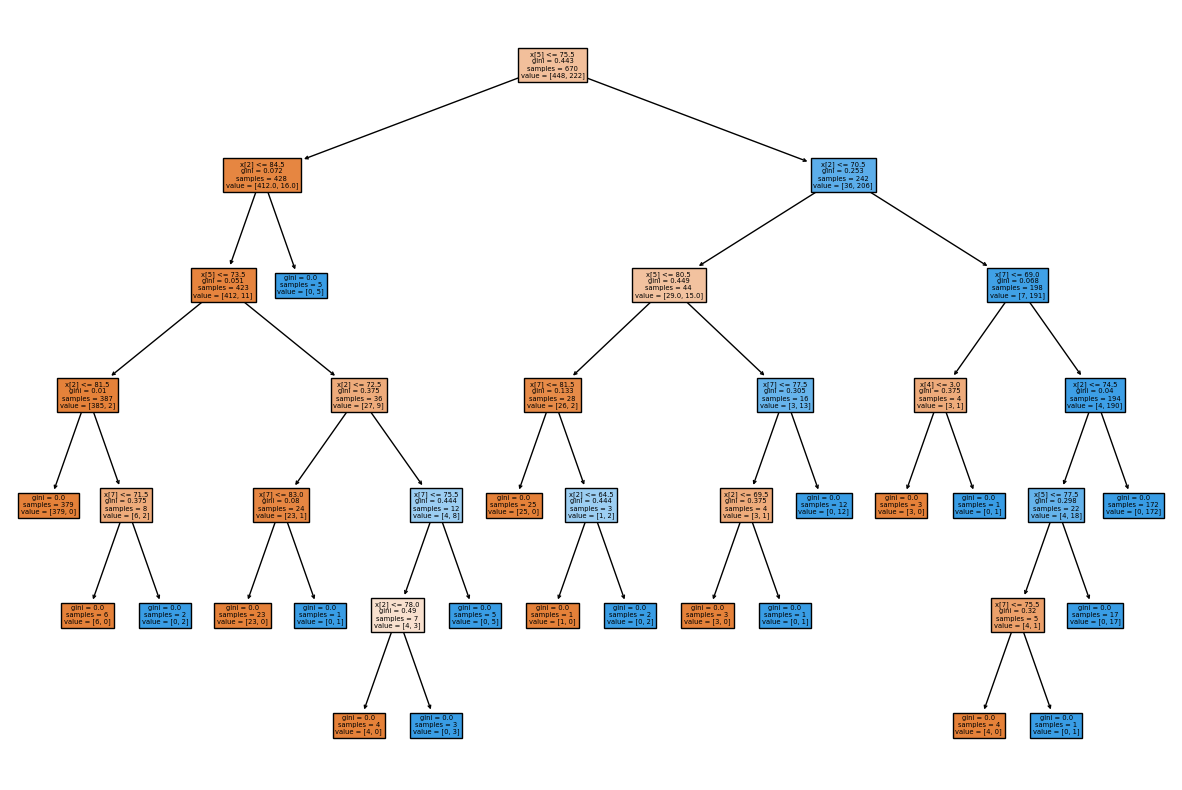

In [98]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)